In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from pathlib import Path

warnings.filterwarnings('ignore')

# Dữ liệu

In [2]:
sales = pd.read_csv('./OnlineSales.csv')
sales.head()

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,...,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
0,100354678,2020-10-01,received,574772.0,oasis_Oasis-064-36,21.0,89.9,1798.0,0.0,1798.0,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
1,100354678,2020-10-01,received,574774.0,Fantastic_FT-48,11.0,19.0,190.0,0.0,190.0,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
2,100354680,2020-10-01,complete,574777.0,mdeal_DMC-610-8,9.0,149.9,1199.2,0.0,1199.2,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
3,100354680,2020-10-01,complete,574779.0,oasis_Oasis-061-36,9.0,79.9,639.2,0.0,639.2,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
4,100367357,2020-11-13,received,595185.0,MEFNAR59C38B6CA08CD,2.0,99.9,99.9,0.0,99.9,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0


In [4]:
# Có tất cả 286392 giao dịch được thực hiện 
sales.shape

(286392, 36)

## Kiểm tra dữ liệu

In [5]:
# Kiểm tra có giá trị null nào trong dữ liệu không? 
pd.DataFrame(sales.isnull().sum())

,0
order_id,0
order_date,0
status,0
item_id,0
sku,0
qty_ordered,0
price,0
value,0
discount_amount,0
total,0


Như vậy, dữ liệu đã cho không có giá trị null/nan.

## Tổng quan về các trường của dữ liệu

In [6]:
# Kiểu dữ liệu của các trường
sales.dtypes.unique()

array([dtype('O'), dtype('float64'), dtype('int64')], dtype=object)

Dữ liệu bao gồm các kiểu 
- O (object/string): thường biểu diễn cho dữ liệu dạng categorical 
- int64: thường là biểu diễn cho dữ liệu dạng categorical, cũng có trường hợp là numeric 
- float64: thường biểu diễn cho dữ liệu dạng numeric

In [7]:
# Hàm để thống kê các giá trị duy nhất

def show_uniqueness(dataframe):
    """Funtion to show the quantity of each column's unique values."""
    unique_array = dataframe.nunique()
    percent_array = np.round(unique_array / dataframe.shape[0] * 100, 2)
    
    unique_df = pd.concat(
        [unique_array, percent_array], 
        keys = ['quantity', 'percent'], 
        axis = 1
    )
    
    return unique_df

### Object 

In [8]:
object_sales = sales.select_dtypes(include=['O'])
object_sales.head()

,order_id,order_date,status,sku,category,payment_method,bi_st,month,Name Prefix,First Name,...,E Mail,Customer Since,SSN,Phone No.,Place Name,County,City,State,Region,User Name
0,100354678,2020-10-01,received,oasis_Oasis-064-36,Men's Fashion,cod,Valid,Oct-2020,Drs.,Jani,...,jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,South,jwtitus
1,100354678,2020-10-01,received,Fantastic_FT-48,Men's Fashion,cod,Valid,Oct-2020,Drs.,Jani,...,jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,South,jwtitus
2,100354680,2020-10-01,complete,mdeal_DMC-610-8,Men's Fashion,cod,Net,Oct-2020,Drs.,Jani,...,jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,South,jwtitus
3,100354680,2020-10-01,complete,oasis_Oasis-061-36,Men's Fashion,cod,Net,Oct-2020,Drs.,Jani,...,jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,South,jwtitus
4,100367357,2020-11-13,received,MEFNAR59C38B6CA08CD,Men's Fashion,cod,Valid,Nov-2020,Drs.,Jani,...,jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,South,jwtitus


In [9]:
show_uniqueness(object_sales)

,quantity,percent
order_id,201716,70.43
order_date,365,0.13
status,13,0.00
sku,47932,16.74
category,15,0.01
payment_method,13,0.00
bi_st,3,0.00
month,12,0.00
Name Prefix,7,0.00
First Name,5161,1.80


Từ tên có thể thấy 
- Cột `order_id` đại diện cho mã giao dịch 
- Cột `order_date` và `Customer Since` nên có định dạng datetime thay vì object
- Các cột gồm: `First Name, Last Name, full_name, E Mail, SSN, Phone No., User Name` mang tính thông tin cá nhân là chủ yếu, nên ta có thể xem xét bỏ hoặc tiền xử lý các trường này trước khi đưa vào mô hình 

### int64

In [10]:
int_sales = sales.select_dtypes(include=['int64'])
int_sales.head()

,year,ref_num,Zip
0,2020,987867,73571
1,2020,987867,73571
2,2020,987867,73571
3,2020,987867,73571
4,2020,987867,73571


In [11]:
show_uniqueness(int_sales)

,quantity,percent
year,2,0.00
ref_num,62065,21.67
Zip,33773,11.79


Các cột đều mang tính categorical.

### float64

In [12]:
float_sales = sales.select_dtypes(include=['float64'])
float_sales.head()

,item_id,qty_ordered,price,value,discount_amount,total,cust_id,age,Discount_Percent
0,574772.0,21.0,89.9,1798.0,0.0,1798.0,60124.0,43.0,0.0
1,574774.0,11.0,19.0,190.0,0.0,190.0,60124.0,43.0,0.0
2,574777.0,9.0,149.9,1199.2,0.0,1199.2,60124.0,43.0,0.0
3,574779.0,9.0,79.9,639.2,0.0,639.2,60124.0,43.0,0.0
4,595185.0,2.0,99.9,99.9,0.0,99.9,60124.0,43.0,0.0


In [13]:
show_uniqueness(float_sales)

,quantity,percent
item_id,286392,100.00
qty_ordered,72,0.03
price,7561,2.64
value,10814,3.78
discount_amount,14577,5.09
total,24451,8.54
cust_id,64248,22.43
age,58,0.02
Discount_Percent,17133,5.98


In [14]:
float_sales.describe()

,item_id,qty_ordered,price,value,discount_amount,total,cust_id,age,Discount_Percent
count,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000
mean,741664.902131,3.011296,851.385253,885.879934,70.039427,815.840507,70048.019054,46.489033,6.069079
std,95746.031827,4.573837,1741.750751,2073.252179,256.880870,1983.580302,30243.856395,16.673288,10.100100
min,574769.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,18.000000,0.000000
25%,659684.500000,2.000000,49.900000,49.900000,0.000000,49.900000,56519.000000,32.000000,0.000000
50%,742309.000000,2.000000,119.000000,158.970000,0.000000,149.800000,74225.500000,47.000000,0.000000
75%,826124.250000,3.000000,950.000000,910.000000,18.383050,800.000000,92357.000000,61.000000,11.000000
max,905208.000000,501.000000,101262.590000,101262.590000,30213.150000,101262.590000,115326.000000,75.000000,75.000000


Dễ thấy, có sự chênh lệch lớn giữa trung bình (mean), min và max của các trường dữ liệu. Điều này gọi ý dữ liệu cần được chuẩn hóa trước khi huấn luyện.

**Tổng kết**:
- Các trường dữ liệu có kiểu `object, int64` mang tính categorical 
- Các trường dữ liệu có kiểu `float64` mang tính numeric

# EDA và Trực quan hóa

In [15]:
# Trước khi thực hiện EDA bạn nên đưa có cột ngày về định dạng datetime 
date_columns = ['order_date', 'Customer Since']
sales[date_columns] = sales[date_columns].apply(pd.to_datetime)
sales.head()

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,...,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
0,100354678,2020-10-01,received,574772.0,oasis_Oasis-064-36,21.0,89.9,1798.0,0.0,1798.0,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
1,100354678,2020-10-01,received,574774.0,Fantastic_FT-48,11.0,19.0,190.0,0.0,190.0,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
2,100354680,2020-10-01,complete,574777.0,mdeal_DMC-610-8,9.0,149.9,1199.2,0.0,1199.2,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
3,100354680,2020-10-01,complete,574779.0,oasis_Oasis-061-36,9.0,79.9,639.2,0.0,639.2,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
4,100367357,2020-11-13,received,595185.0,MEFNAR59C38B6CA08CD,2.0,99.9,99.9,0.0,99.9,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0


**Biến mục tiêu trong bài toán này là `Discount_Percent`**

In [16]:
numeric_cols = float_sales.columns
# Bỏ các cột id ra khỏi các cột numeric
numeric_ids = ['item_id', 'cust_id']
numeric_cols = list(set(numeric_cols).difference(numeric_ids))
numeric_cols

['value',
 'total',
 'qty_ordered',
 'price',
 'Discount_Percent',
 'discount_amount',
 'age']

number of numeric field:  7


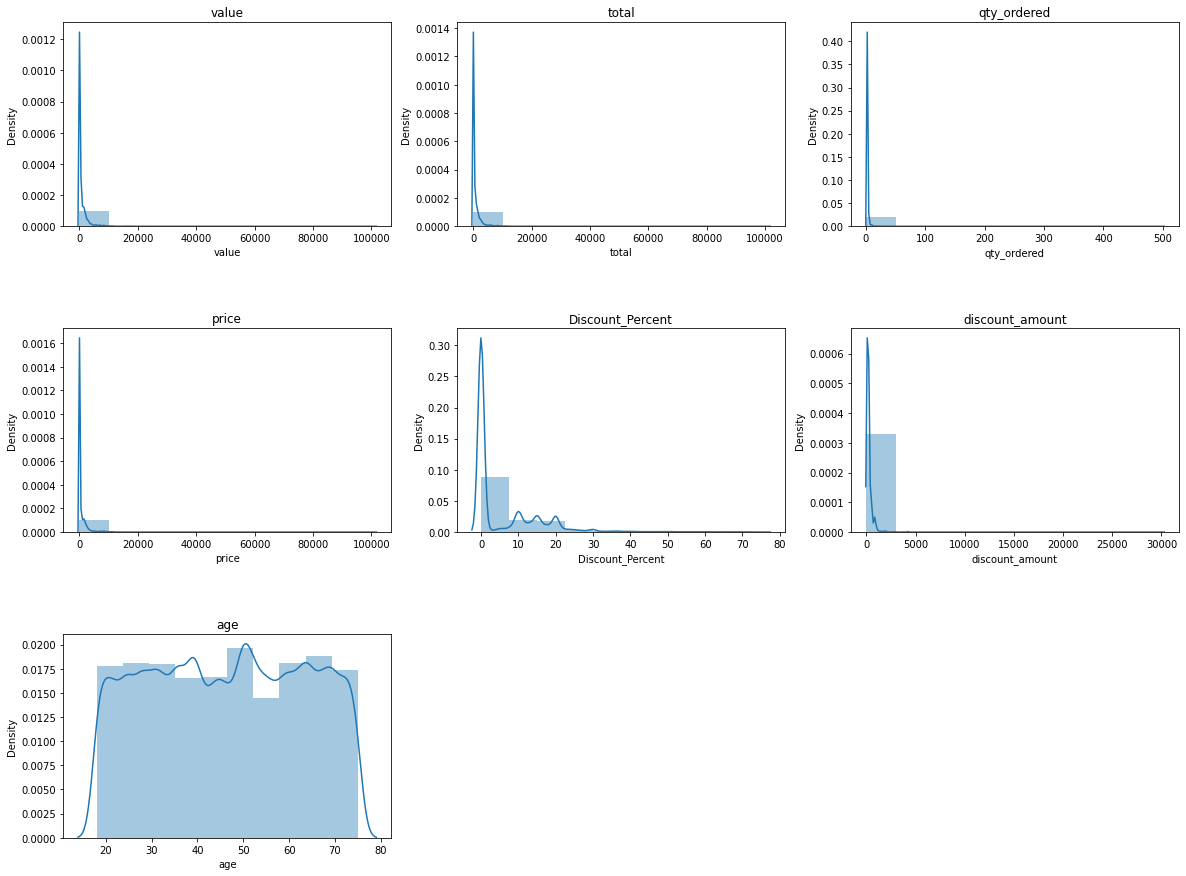

In [17]:
def _plot_numeric_classes(df, col, bins=100, hist=True, kde=True):
    sns.distplot(df[col],
                 bins = bins,
                 hist = hist,
                 kde = kde)

def _distribution_numeric(df, numeric_cols, row=3, col=3, figsize=(20, 15), bins = 10):
    """
    numeric_cols: list các tên cột
    row: số lượng dòng trong lưới đồ thị
    col: số lượng cột trong lưới đồ thị
    figsize: kích thước biểu đồ
    bins: số lượng bins phân chia trong biểu đồ distribution
    """
    print('number of numeric field: ', len(numeric_cols))
    plt.figure(figsize = figsize)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
    for i in range(1, len(numeric_cols)+1, 1):
        try:
            plt.subplot(row, col, i)
            _plot_numeric_classes(df, numeric_cols[i-1], bins = bins)
            plt.title(numeric_cols[i-1])
        except:
            print('Error {}'.format(numeric_cols[i-1]))
            break

_distribution_numeric(sales, numeric_cols, row=3, col=3)

Các biến dường như đều có phân bố lệch trái trù biến `age`.

In [18]:
# Chỉ xem xét phân bố của một số biến
summary_object_df = show_uniqueness(object_sales)
threshold = 100    # chỉ những cột nào có ít hơn 100 giá trị khác nhau
csd_columns = summary_object_df[summary_object_df['quantity'] < threshold].index.to_list()
csd_columns

['status',
 'category',
 'payment_method',
 'bi_st',
 'month',
 'Name Prefix',
 'Middle Initial',
 'Gender',
 'State',
 'Region']

number of category field:  10


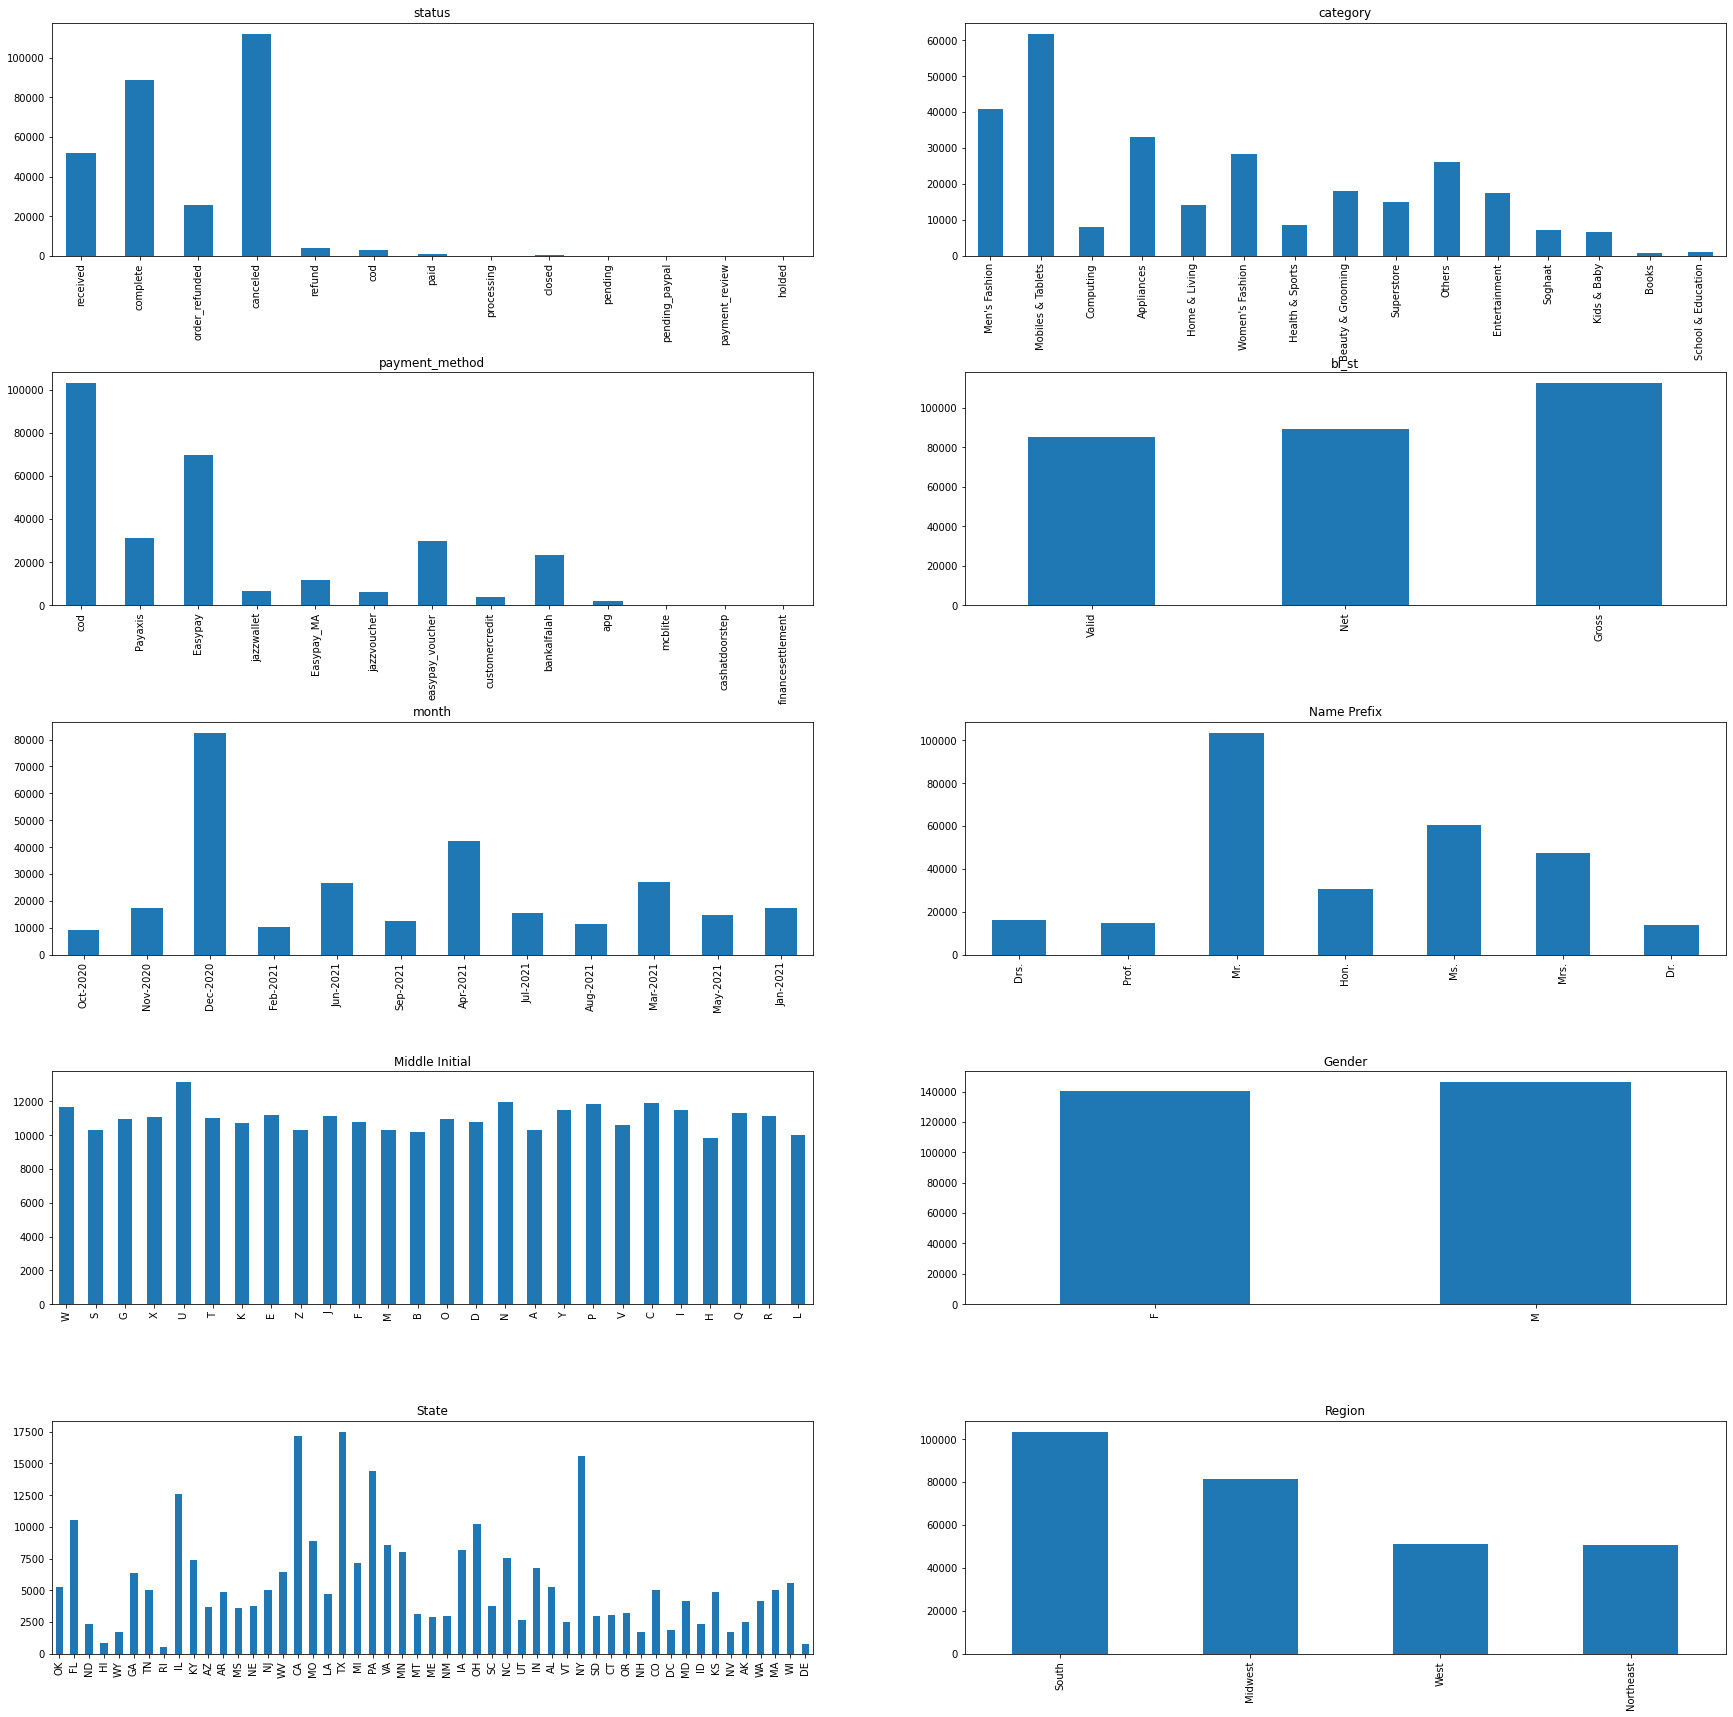

In [19]:
def _plot_bar_classes(df, cols):
    df[cols].value_counts(sort=False).plot.bar()

def _distribution_cate(df, cate_cols, row = 1, col = 2, figsize = (24, 8)):
    """
    cate_cols: list các tên cột
    row: số lượng dòng trong lưới đồ thị
    col: số lượng cột trong lưới đồ thị
    figsize: kích thước biểu đồ
    """
    print('number of category field: ', len(cate_cols))
    plt.figure(figsize = figsize)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)    
    for i in range(1, len(cate_cols)+1, 1):
        try:
            plt.subplot(row, col, i)
            _plot_bar_classes(df, cate_cols[i-1])
            plt.title(cate_cols[i-1])
        except:
              break

_distribution_cate(sales, csd_columns, row = 5, col = 2, figsize = (30, 30))

## Sự ảnh hưởng của các biến khác lên biến mục tiêu
### Biến liên tục (numeric)

number of numeric field:  6


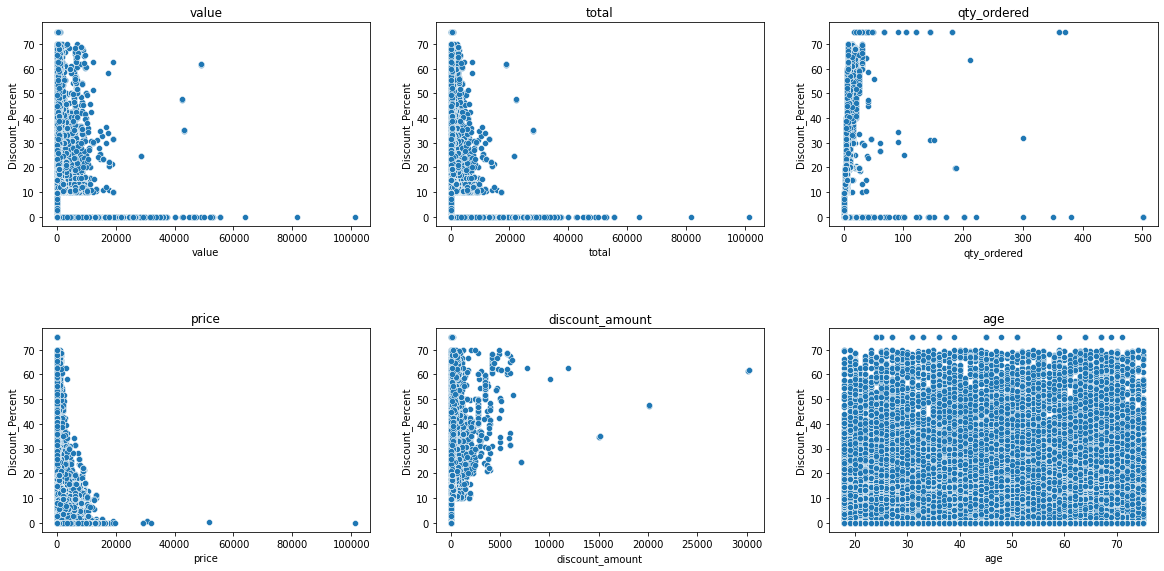

In [20]:
target_var = 'Discount_Percent'
numeric_cols = list(set(numeric_cols).difference([target_var]))

def _plot_numeric(df, numeric_cols, target_var, row=3, col=3, figsize=(20, 15)):
    print('number of numeric field: ', len(numeric_cols))
    plt.figure(figsize = figsize)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
    for i in range(1, len(numeric_cols)+1, 1):
        try:
            plt.subplot(row, col, i)
            sns.scatterplot(data=df, x = numeric_cols[i-1], y = target_var)
            plt.title(numeric_cols[i-1])
        except:
            print('Error {}'.format(numeric_cols[i-1]))
            break

_plot_numeric(sales, numeric_cols, target_var, row=3, col=3)

**Insight**:
- Dường như `age` không có ảnh hưởng gì tới `Discount_Percent`
- Các giá trị `Discount_Percent` lớn thường tập trung chủ yếu ở khoảng 1/5 miền giá trị 

### Biến rời rạc (categorical) - chỉ xem xét 1 vài biến

number of categorical field:  10


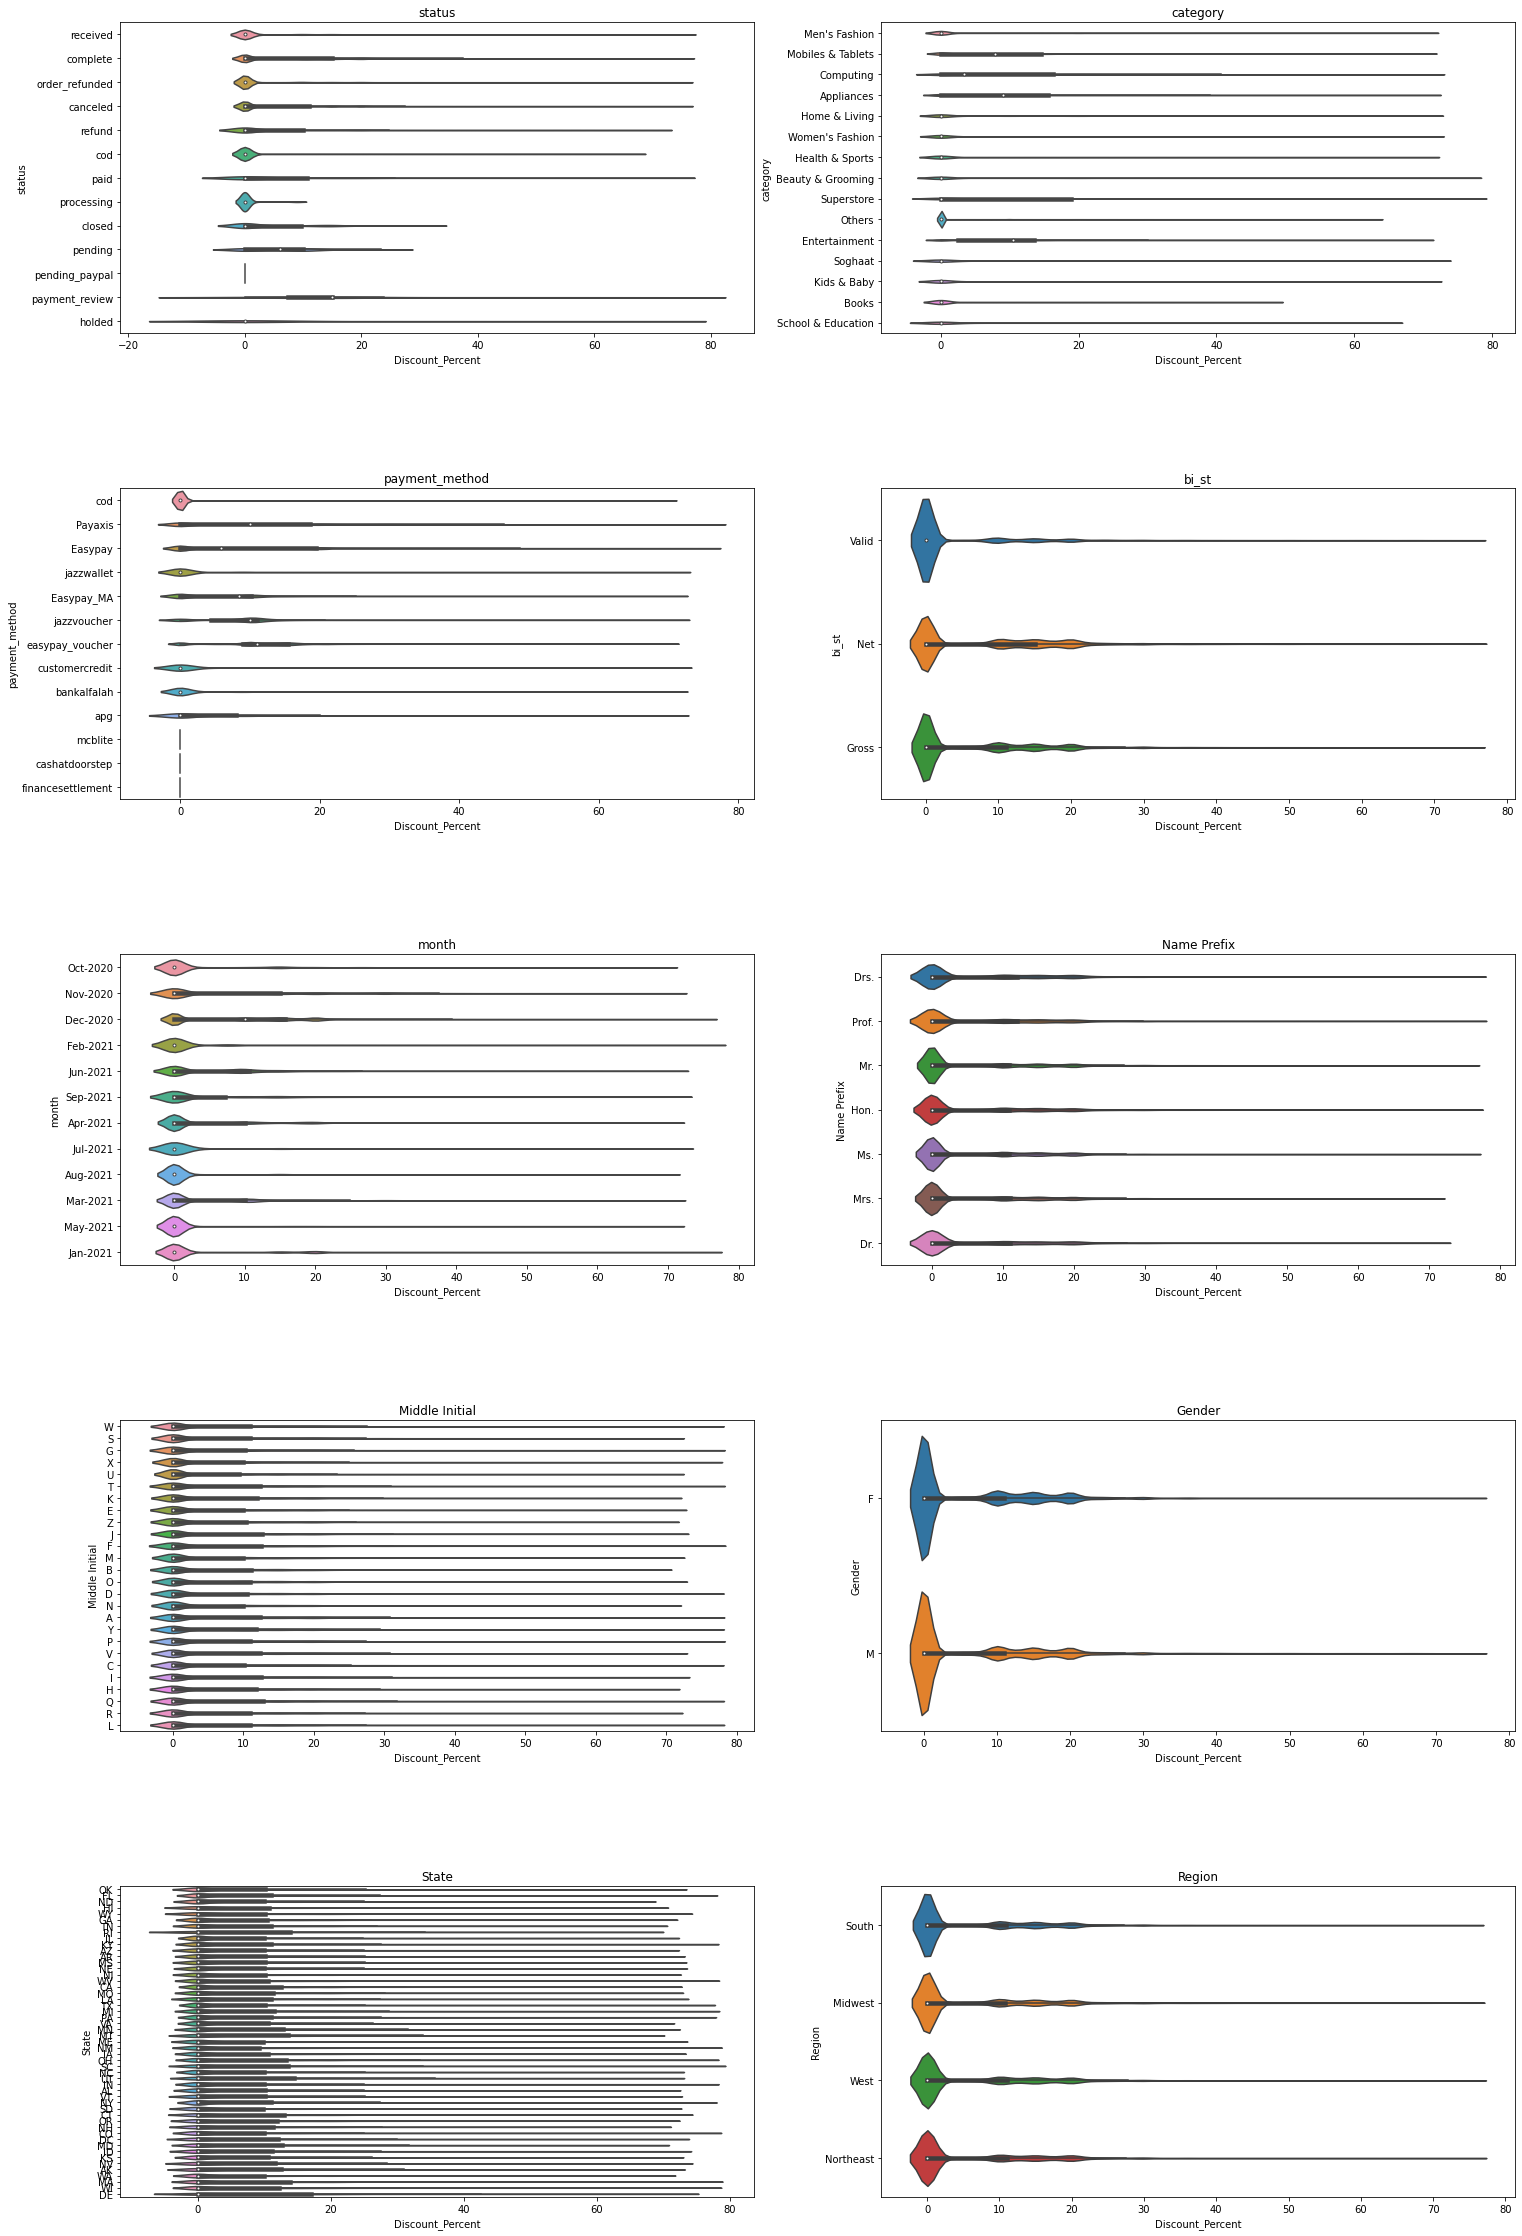

In [21]:
def _plot_categorical(df, categorical_cols, target_var, row=3, col=3, figsize=(25, 40)):
    print('number of categorical field: ', len(categorical_cols))
    plt.figure(figsize = figsize)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
    for i in range(1, len(categorical_cols)+1, 1):
        try:
            plt.subplot(row, col, i)
            sns.violinplot(data=sales, x = target_var, y = categorical_cols[i-1])
            plt.title(categorical_cols[i-1])
        except:
            print('Error {}'.format(categorical_cols[i-1]))
            break

_plot_categorical(sales, csd_columns, target_var, row=5, col=2)

Một cách khái quát, các giá trị discount 0 chiếm phần lớn trong dữ liệu.

# Tiền xử lý
Hướng tiếp cận:
- Dự đoán sale có thể dự đoán theo ngày, tuần, ...
- Bỏ các cột: `order_id, item_id, cust_id, year`
- `order_date` có 365 ngày, nên lấy ngày tháng, không lấy năm
- `Customer Since` nên chuyển về thâm niên của một khách hàng, được tính từ năm hiện tại (max trong giao dịch) trừ đi năm bắt đầu mua hàng online.
- `month` chỉ nên lấy giá trị tháng, không nên đi kèm theo năm
- `SSN` và `Phone No` chỉ nên lấy 3 số đầu

In [22]:
def preprocessing(df):
    df = sales.copy()
    df = df.sort_values(by='order_date')
    current_year = max(sales['order_date'].dt.year)
    
    # bỏ một số cột 
    removed_columns = ['order_id', 'item_id', 'cust_id', 'year']
    df = df.drop(columns=removed_columns)
    # đổi định dạng order_date và month
    df['order_date'] = df['order_date'].dt.strftime('%m-%d')
    df['month'] = df['month'].str[:3]    # Ex: Oct-2020 -> Oct
    # Tính thâm niên 
    df['Customer Since'] = current_year - df['Customer Since'].dt.year
    # SSN va Phone No. 
    df['SSN'] = df['SSN'].str[:3]
    df['Phone No. '] = df['Phone No. '].str[:3]
    
    return df

temp = preprocessing(sales)
temp

,order_date,status,sku,qty_ordered,price,value,discount_amount,total,category,payment_method,...,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
0,10-01,received,oasis_Oasis-064-36,21.0,89.9,1798.0,0.0,1798.0,Men's Fashion,cod,...,627,405,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
2403,10-01,canceled,GA_BS-11-136012,2.0,393.8,393.8,0.0,393.8,Women's Fashion,cod,...,221,803,Greenville,Greenville,Greenville,SC,29606,South,misturtevant,0.0
2402,10-01,complete,NN_Crystal Jelly Orange 80g,11.0,5.5,55.0,0.0,55.0,Soghaat,cod,...,044,303,Padroni,Logan,Padroni,CO,80745,West,swnehls,0.0
2401,10-01,complete,Uni-Dove-Lux-deal,11.0,44.0,440.0,0.0,440.0,Superstore,cod,...,044,303,Padroni,Logan,Padroni,CO,80745,West,swnehls,0.0
2400,10-01,complete,MTA_1032,2.0,35.0,35.0,0.0,35.0,Mobiles & Tablets,customercredit,...,374,209,Irvine,Irvine,Irvine,CA,92730,West,sqdicarlo,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275605,09-30,canceled,MEFNAR5B11A25147067,2.0,142.4,142.4,0.0,142.4,Men's Fashion,Easypay,...,588,239,Bunnell,Flagler,Bunnell,FL,32110,South,irdowler,0.0
132954,09-30,pending,APPOSA5ACDC3029F2C4,6.0,2.8,14.0,0.0,14.0,Appliances,jazzvoucher,...,727,803,Columbia,Lexington,Columbia,SC,29228,South,ojprocter,0.0
192640,09-30,canceled,BAGEMA5ACCB4FF1C93E,2.0,16.6,16.6,0.0,16.6,Beauty & Grooming,bankalfalah,...,083,212,Philmont,Columbia,Philmont,NY,12565,Northeast,rsborton,0.0
5111,09-30,pending,MATINF59BAB39FDBEF1,3.0,676.0,1352.0,0.0,1352.0,Mobiles & Tablets,jazzvoucher,...,422,262,Waterford,Racine,Waterford,WI,53185,Midwest,cwsterner,0.0


Từ đó, ta có một bộ dữ liệu đã được xử lý. Và 
- Với các cột categorical, mã hóa theo Target Encoder 
- Chuẩn hóa dữ liệu với các cột numeric

# Xây dựng luồng xử lý dữ liệu

In [4]:
# UNCOMMENT nếu báo lỗi về thư viện category_encoders
# !pip install category_encoders

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from category_encoders import TargetEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

target_column = 'Discount_Percent'
numeric_columns = temp.select_dtypes(include=['float64']).columns
categorical_columns = temp.select_dtypes(exclude=['float64']).columns.to_list()

# Bỏ biến mục tiêu ra khỏi numeric
numeric_columns = [col for col in numeric_columns if col != target_column]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_columns), 
        ('cat', TargetEncoder(), categorical_columns), 
    ]
)

# Huấn luyện mô hình 
**Dự đoán sale theo ngày với các thuật toán**:
- Linear Regression 
- Ridge
- Random Forest

In [26]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold

# Chia dữ liệu thành 2 tập: training và testing
X, y = temp.drop(columns=target_column), temp[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

models = [LinearRegression(), Ridge(), RandomForestRegressor()]

for model in models:
    completed_pineline = Pipeline(
        steps=[("preprocessor", preprocessor), ('regressor', model)]
    )
    
    completed_pineline.fit(X_train, y_train)
    y_pred = completed_pineline.predict(X_test)
    score = mean_squared_error(y_test, y_pred)
    name = model.__class__.__name__
    print(f'{name}: {score}')

LinearRegression: 50.111491031838625
Ridge: 50.323129276785096
RandomForestRegressor: 0.5861623566766478


**Huấn luyện nhiều lần**

In [31]:
# Xác định KFold
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
metric = make_scorer(mean_squared_error)
all_scores = []

for model in models:
    completed_pineline = Pipeline(
        steps=[("preprocessor", preprocessor), ('regressor', model)]
    )
    
    scores = cross_val_score(completed_pineline, X, y, scoring=metric, cv=cv, n_jobs=-1)
    all_scores.append(scores)

    name = model.__class__.__name__
    print(f'{name}: {scores}')

LinearRegression: [48.37938007 48.41854185 50.30302286 48.72961335 48.61289243 50.9825607
 48.69862648 51.87637172 51.87820484 51.52510426 51.04551474 53.01028802
 48.92124173 47.9775247  50.45947526 49.45898292 49.68333301 54.34869776
 49.4368879  45.86265618 50.86579231 52.25725072 47.2116858  50.86142928
 54.60813765 46.96923376 47.44580818 49.16855091 49.52179679 50.26147498]
Ridge: [48.57985941 48.59864441 50.30191939 48.70881836 48.5945095  51.08569382
 48.93019622 52.03607177 51.93191397 51.6905687  51.20150636 52.59724085
 49.1238695  48.17459941 50.6861381  49.6666121  49.82103497 53.89265019
 49.65692616 46.07736518 51.07210992 52.2356383  47.38275239 50.7895461
 54.6014017  47.13196748 47.59250062 49.38646235 49.70782617 50.29828105]
RandomForestRegressor: [0.42674685 0.56956068 0.54201374 0.58507803 0.39135101 0.41162527
 0.44784384 0.38761038 0.65281701 0.4476888  0.56234281 0.41543459
 0.56248195 0.78271458 0.44453693 0.56713465 0.36805529 0.40458104
 0.34692374 0.3678424

Text(0.5, 1.0, 'Scores Metrics')

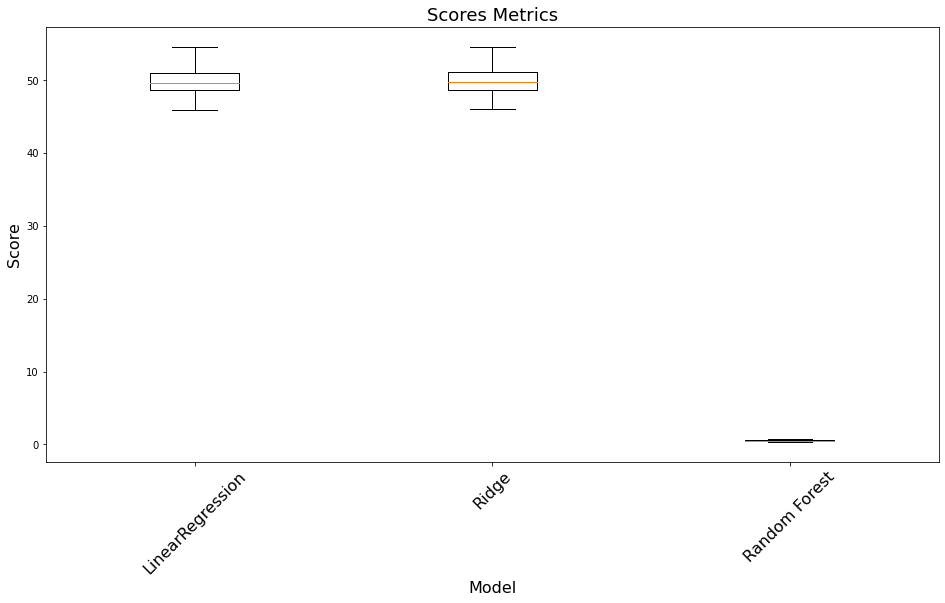

In [32]:
import matplotlib.pyplot as plt
model_names = ['LinearRegression', 'Ridge', 'Random Forest']

# Draw bboxplot 
plt.figure(figsize=(16, 8))
plt.boxplot(all_scores)
plt.xlabel('Model', fontsize=16)
plt.ylabel('Score', fontsize=16)
plt.xticks(np.arange(len(model_names))+1, model_names, rotation=45, fontsize=16)
plt.title("Scores Metrics", fontsize=18)